<a href="https://colab.research.google.com/github/Harish7783/Data-Science-Projects/blob/main/probability_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/aerofit_treadmill.txt')

In [ ]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape


(180, 9)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
numerical_summary=df.describe(include='all')
numerical_summary

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Converting categorical values to the category.

In [ ]:
categorical_columns=['Product','Gender','MaritalStatus']
df[categorical_columns] = df[categorical_columns].astype('category')
print(df.dtypes)


Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


In [ ]:
categorical_summary = df.describe(include=['category'])
categorical_summary

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Conditional Probability

In [ ]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Marginal probability

In [ ]:
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Non-graphical analysis

In [ ]:
Age_counts = df['Age'].value_counts()
Education_counts = df['Education'].value_counts()
Usage_counts = df['Usage'].value_counts()
Fitness_counts = df['Fitness'].value_counts()
Income_counts = df['Income'].value_counts()
Miles_counts = df['Miles'].value_counts()
value_counts = pd.DataFrame({'Age': Age_counts, 'Education': Education_counts, 'Usage': Usage_counts, 'Fitness': Fitness_counts, 'Income': Income_counts, 'Miles': Miles_counts})
print(value_counts)

        Age  Education  Usage  Fitness  Income  Miles
1       NaN        NaN    NaN      2.0     NaN    NaN
2       NaN        NaN   33.0     26.0     NaN    NaN
3       NaN        NaN   69.0     97.0     NaN    NaN
4       NaN        NaN   52.0     24.0     NaN    NaN
5       NaN        NaN   17.0     31.0     NaN    NaN
...     ...        ...    ...      ...     ...    ...
95508   NaN        NaN    NaN      NaN     1.0    NaN
95866   NaN        NaN    NaN      NaN     1.0    NaN
99601   NaN        NaN    NaN      NaN     1.0    NaN
103336  NaN        NaN    NaN      NaN     1.0    NaN
104581  NaN        NaN    NaN      NaN     2.0    NaN

[139 rows x 6 columns]


Univariate and Bi-variate analysis on the following attributes:
*   Age
*   Education
*   Usage
*   Fitness
*   Income
*   Miles










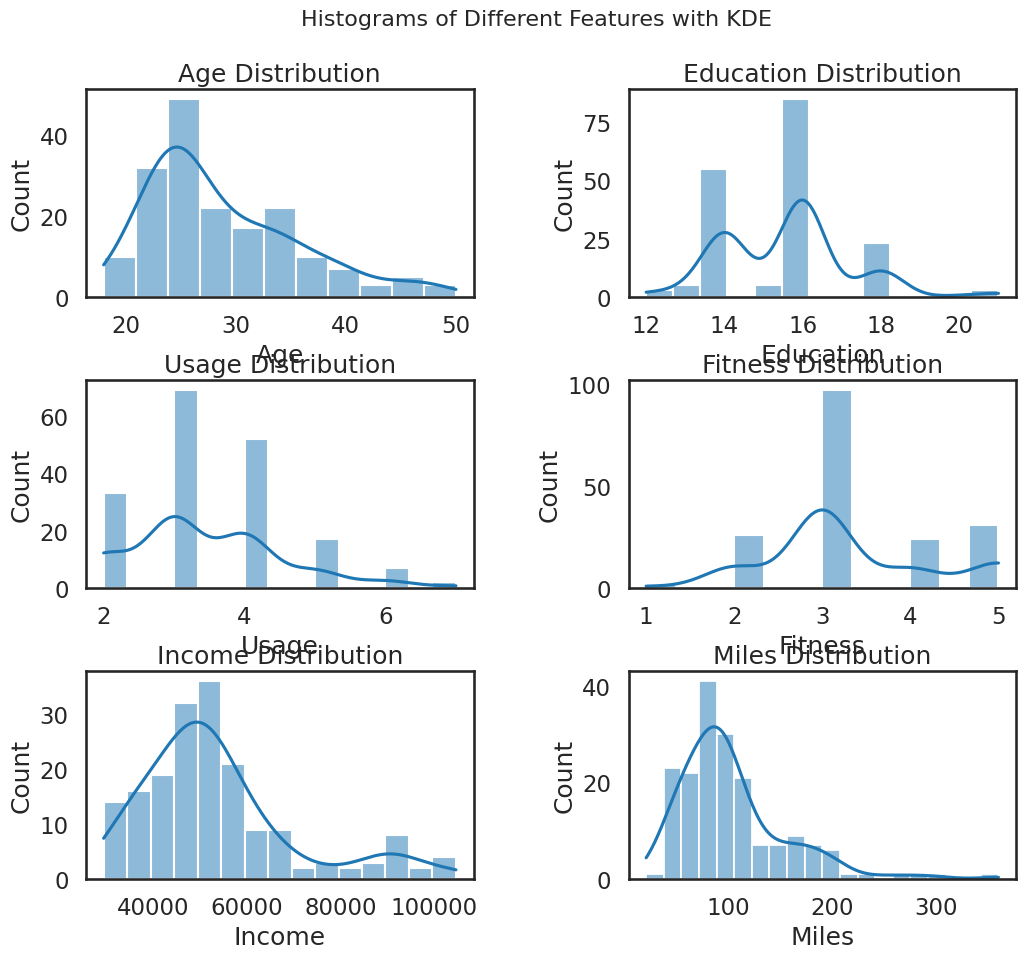

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.9)

# Plotting the histograms with KDE
sns.histplot(data=df, x='Age', kde=True, ax=axis[0, 0])
axis[0, 0].set_title('Age Distribution')

sns.histplot(data=df, x='Education', kde=True, ax=axis[0, 1])
axis[0, 1].set_title('Education Distribution')

sns.histplot(data=df, x='Usage', kde=True, ax=axis[1, 0])
axis[1, 0].set_title('Usage Distribution')

sns.histplot(data=df, x='Fitness', kde=True, ax=axis[1, 1])
axis[1, 1].set_title('Fitness Distribution')

sns.histplot(data=df, x='Income', kde=True, ax=axis[2, 0])
axis[2, 0].set_title('Income Distribution')

sns.histplot(data=df, x='Miles', kde=True, ax=axis[2, 1])
axis[2, 1].set_title('Miles Distribution')

# Setting a main title for the figure
fig.suptitle('Histograms of Different Features with KDE', fontsize=16)

# Display the plot
plt.show()

Detecting outliers using boxplot

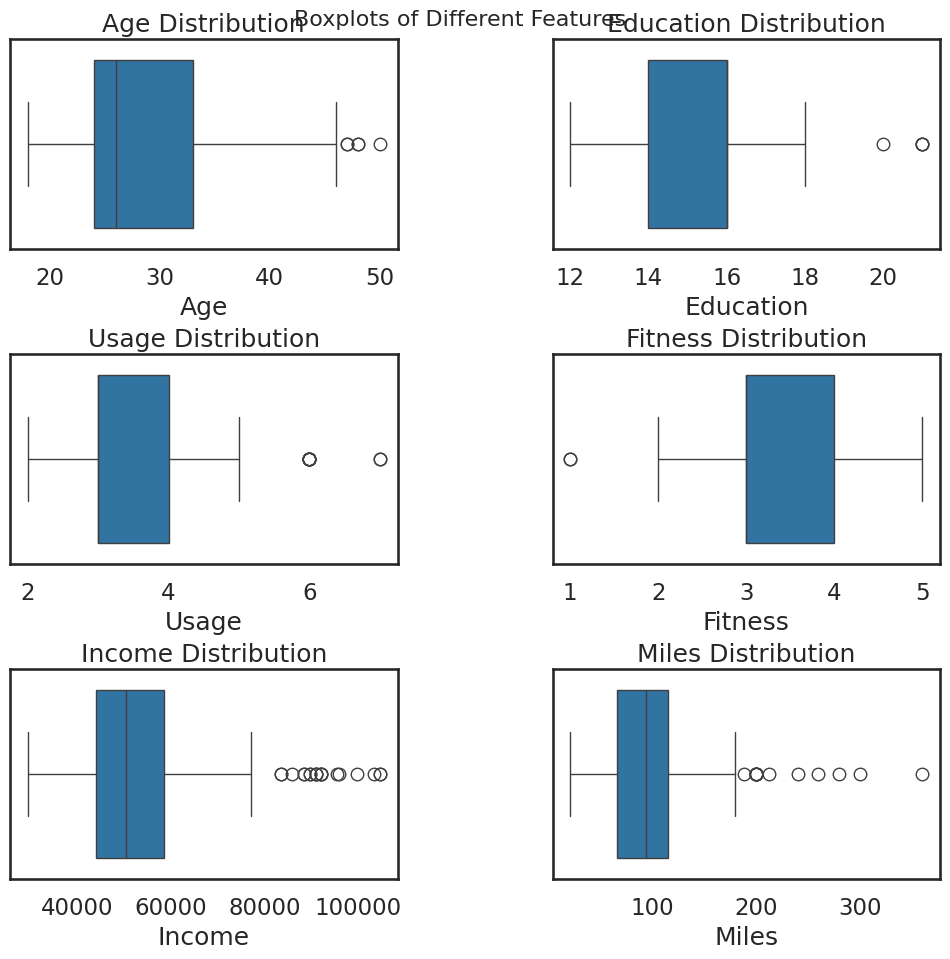

In [ ]:
# Creating the subplots with specified dimensions
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.4, top=0.95)

# Plotting the boxplots
sns.boxplot(data=df, x='Age', orient='h', ax=axis[0, 0])
axis[0, 0].set_title('Age Distribution')

sns.boxplot(data=df, x='Education', orient='h', ax=axis[0, 1])
axis[0, 1].set_title('Education Distribution')

sns.boxplot(data=df, x='Usage', orient='h', ax=axis[1, 0])
axis[1, 0].set_title('Usage Distribution')

sns.boxplot(data=df, x='Fitness', orient='h', ax=axis[1, 1])
axis[1, 1].set_title('Fitness Distribution')

sns.boxplot(data=df, x='Income', orient='h', ax=axis[2, 0])
axis[2, 0].set_title('Income Distribution')

sns.boxplot(data=df, x='Miles', orient='h', ax=axis[2, 1])
axis[2, 1].set_title('Miles Distribution')

# Setting a main title for the figure
fig.suptitle('Boxplots of Different Features', fontsize=16)

# Display the plot
plt.show()

Qualitative attributes distribution

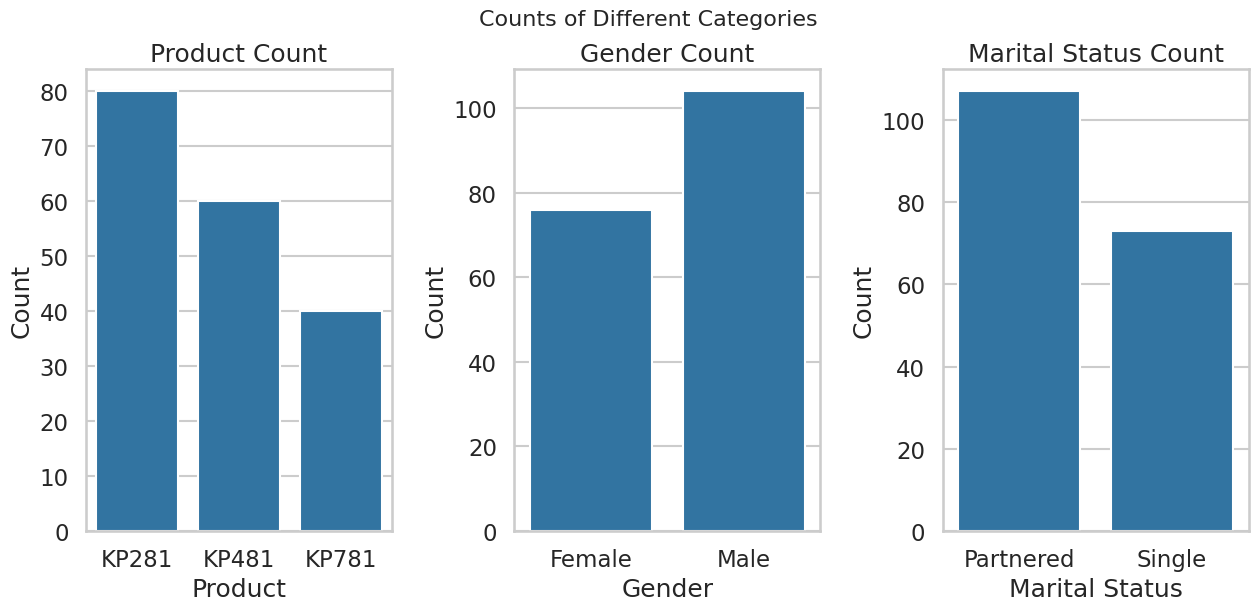

In [ ]:
# Set style
sns.set_style('whitegrid')

# Creating the subplots with specified dimensions
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.subplots_adjust(wspace=0.4)

# Plotting the count plots with added titles and labels
sns.countplot(data=df, x='Product', ax=axs[0])
axs[0].set_title('Product Count')
axs[0].set_xlabel('Product')
axs[0].set_ylabel('Count')

sns.countplot(data=df, x='Gender', ax=axs[1])
axs[1].set_title('Gender Count')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

sns.countplot(data=df, x='MaritalStatus', ax=axs[2])
axs[2].set_title('Marital Status Count')
axs[2].set_xlabel('Marital Status')
axs[2].set_ylabel('Count')

# Setting a main title for the figure
fig.suptitle('Counts of Different Categories', fontsize=16)

# Display the plot
plt.show()

In [ ]:
df_grouped=df[['Product','Gender','MaritalStatus']].melt()
df_grouped.groupby(['variable','value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Bi_variate analysis

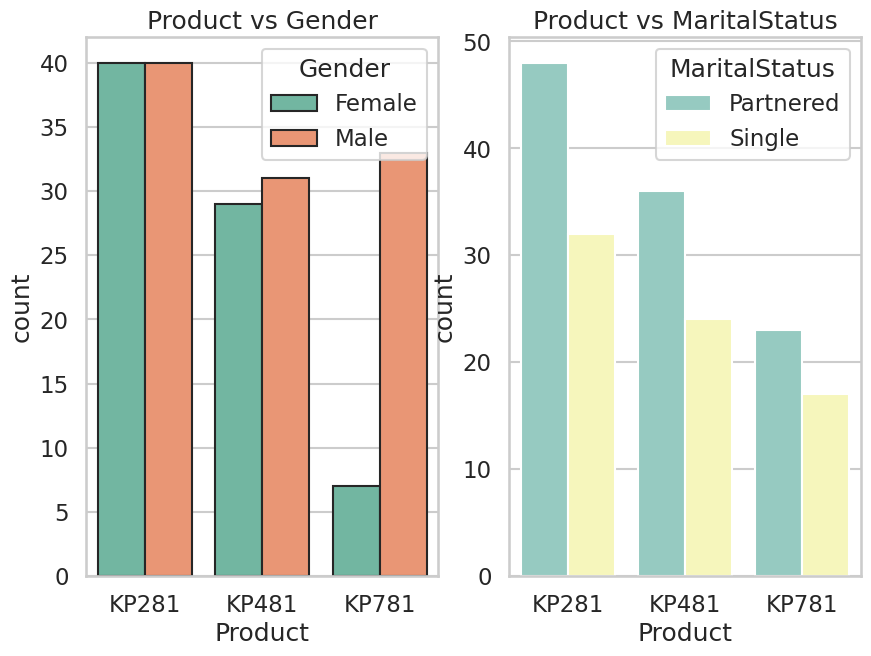

In [ ]:
sns.set_style(style='whitegrid')
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,7))
sns.countplot(data=df,x="Product",hue='Gender',edgecolor="0.15",palette='Set2',ax=axs[0])
sns.countplot(data=df,x="Product",hue='MaritalStatus',palette='Set3',ax=axs[1])
axs[0].set_title('Product vs Gender')
axs[1].set_title('Product vs MaritalStatus')
plt.show()


product purchased effect
1.Age
2.Education
3.Usage
4.Fitness
5.Income
6.Miles


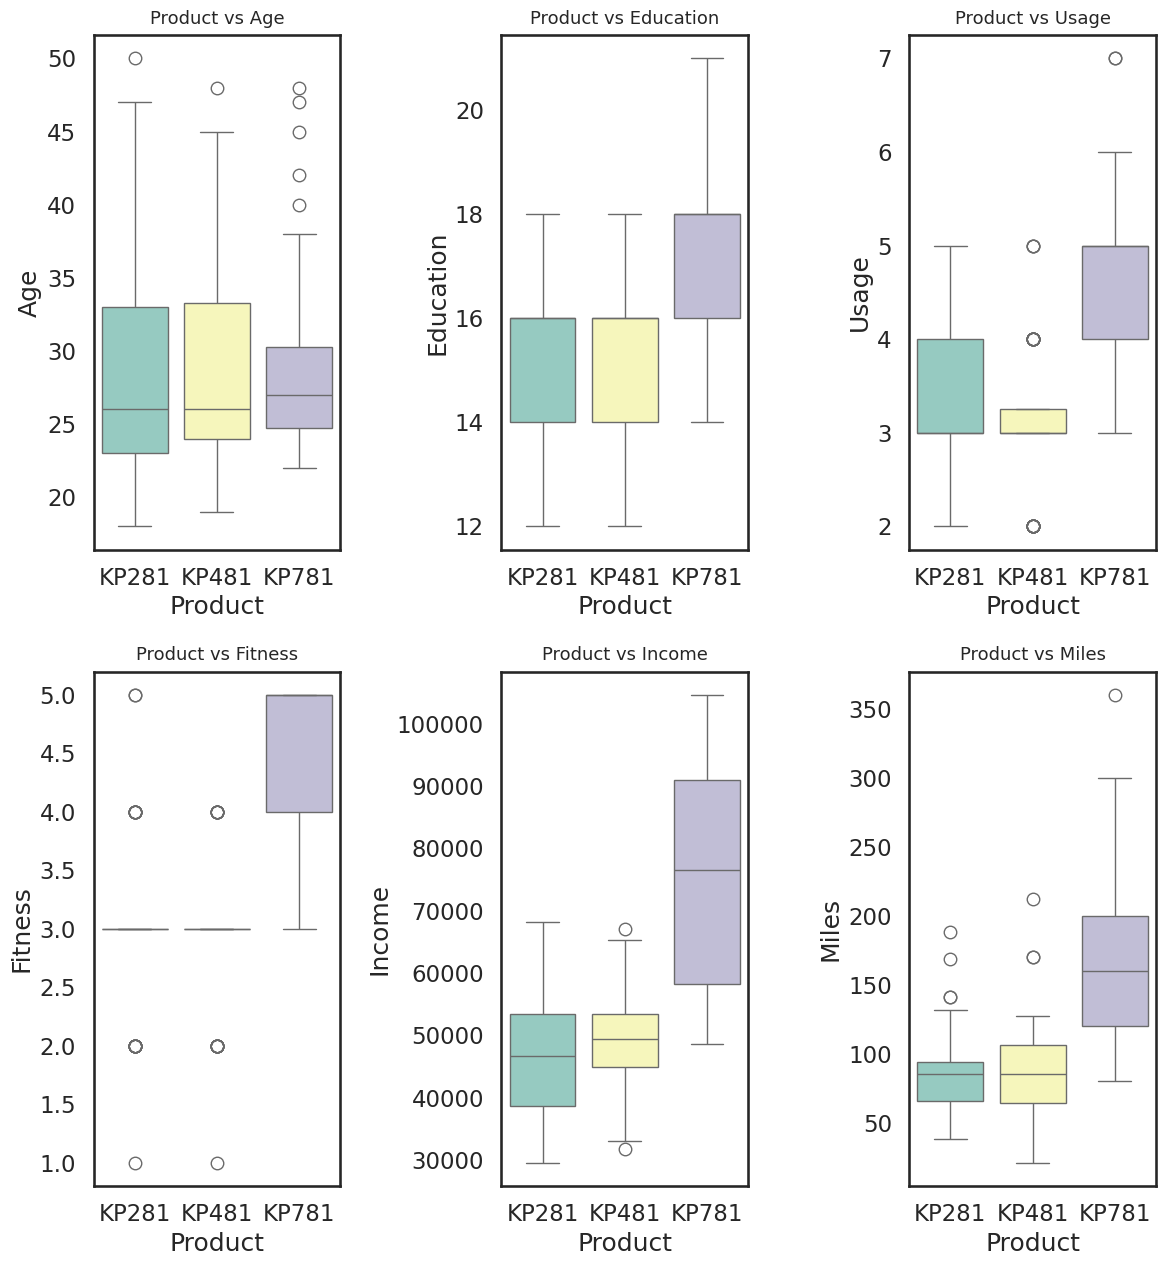

In [ ]:
# Variables to plot
pro_pur = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

sns.set_style('white')

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 13))

# Initialize count
count = 0

# Loop to create boxplots
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=pro_pur[count], hue='Product', ax=axs[i, j], palette='Set3', legend=False)
        axs[i, j].set_title(f"Product vs {pro_pur[count]}", pad=8, fontsize=13)
        count += 1

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


Multivariate analysis

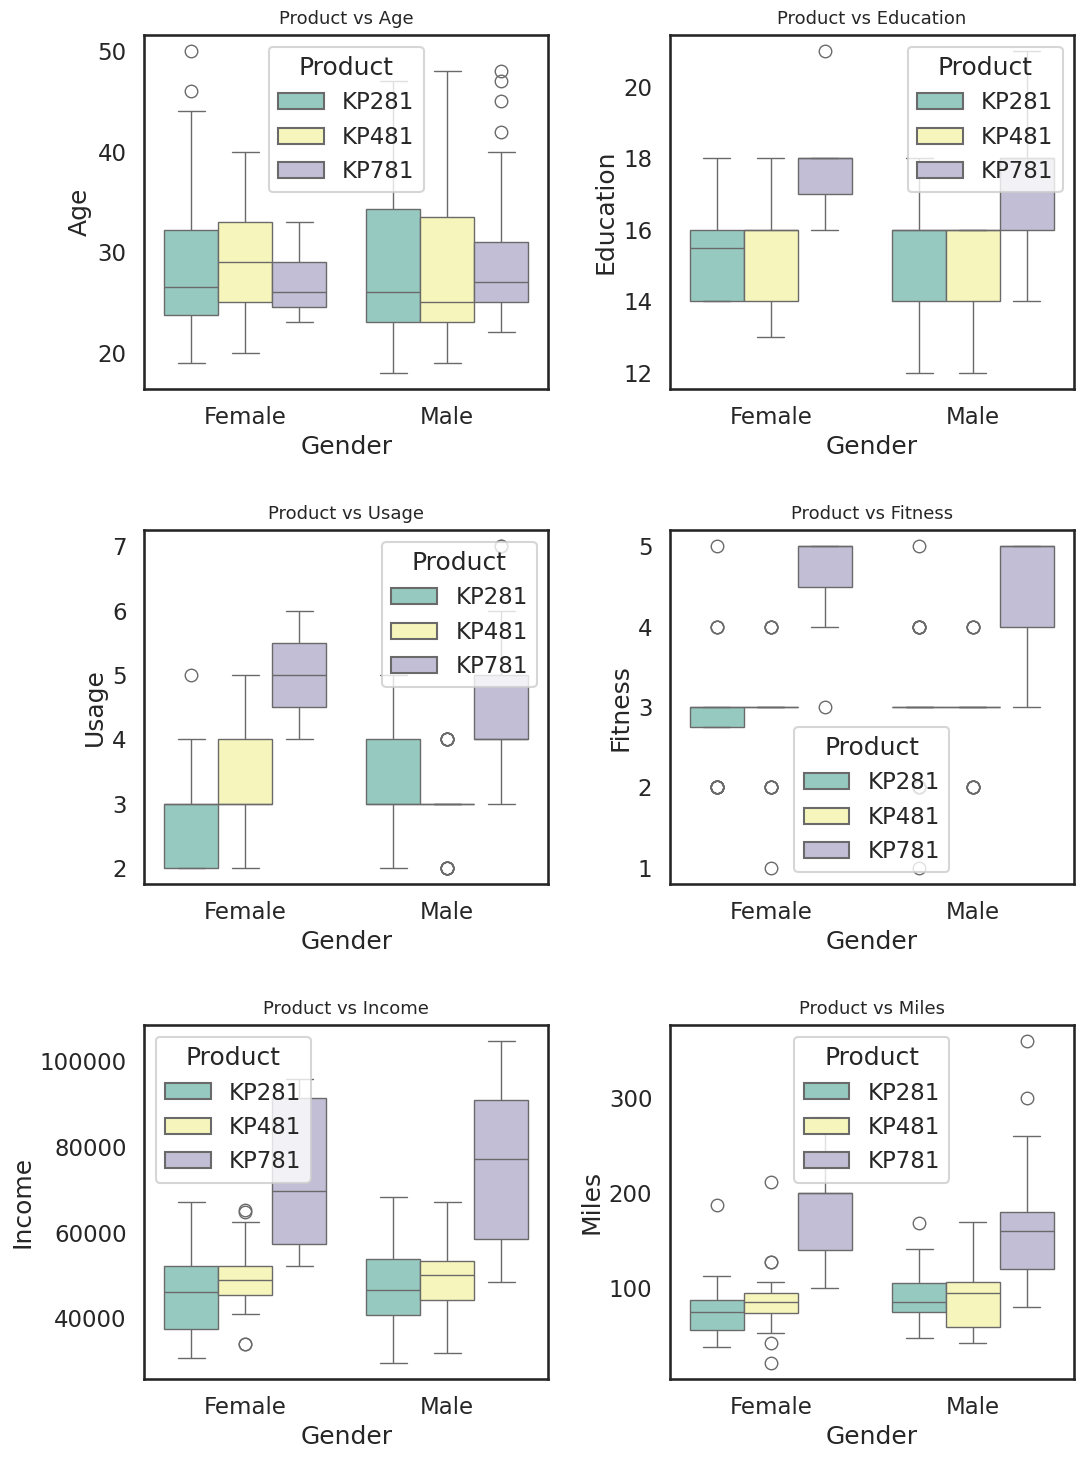

In [ ]:
# Variables to plot
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

sns.set_style("white")

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))  # Adjusted figsize for better layout

# Adjust the layout
fig.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)

# Initialize count
count = 0

# Loop to create boxplots
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i, j], palette='Set3')
        axs[i, j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)
        count += 1

# Show the plot
plt.show()

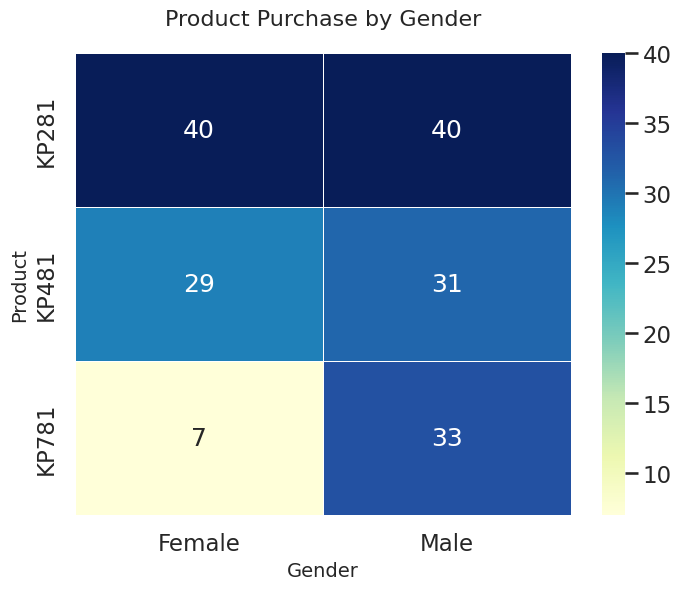

In [ ]:
# Create crosstab
crosstab = pd.crosstab(df["Product"], df["Gender"])

# Set plot style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap="YlGnBu", cbar=True, linewidths=.5, ax=ax)

# Add title and labels
ax.set_title('Product Purchase by Gender', fontsize=16, pad=20)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Product', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

Based on the provided analysis and visualizations, here are some business insights and recommendations for Aerofit:

### Business Insights:
1. **Product Preferences by Demographics**:
   - **KP281**: Most popular among users, with a significant preference among females.
   - **KP481 and KP781**: Also popular, with KP781 having higher usage among males.

2. **Age and Education**:
   - Younger users show diverse product preferences.
   - Higher education levels correlate with higher usage and fitness levels.

3. **Income and Usage**:
   - Higher-income groups tend to prefer KP781.
   - Usage and fitness levels are higher for KP481 and KP781 users, indicating these are preferred by fitness enthusiasts.

4. **Gender and Marital Status**:
   - Clear gender preferences for products.
   - Marital status also affects product choice, with married individuals preferring certain models over others.

### Business Improvement Scope:
1. **Targeted Marketing**:
   - Develop campaigns focused on gender preferences, emphasizing features appealing to each group.
   - Create targeted advertisements for high-income groups to promote KP781.

2. **Product Development**:
   - Introduce features appealing to younger users and fitness enthusiasts.
   - Consider new models or variations targeting demographics with lower representation.

3. **Customer Engagement**:
   - Personalized fitness programs and offers based on usage patterns.
   - Gather continuous feedback to refine product features and improve customer satisfaction.

4. **Pricing Strategy**:
   - Implement dynamic pricing based on income levels and demographic data to maximize sales.

5. **Cross-Selling Opportunities**:
   - Identify potential for cross-selling based on product usage and demographic data.
   - Develop bundles or packages that appeal to specific user segments.

6. **Retail and Online Presence**:
   - Optimize retail and online strategies to align with identified demographic preferences.
   - Ensure product availability and marketing efforts are focused on high-demand areas.

### Next Steps:
1. **Deep Dive Analysis**:
   - Conduct further statistical analysis to validate findings and uncover deeper insights.
   - Perform market research to gather qualitative data on customer preferences.

2. **Strategic Implementation**:
   - Translate insights into actionable strategies and track their impact.
   - Continuously adapt marketing and product strategies based on real-time data and customer feedback.

Implementing these strategies can help Aerofit better align its product offerings and marketing efforts with customer preferences, thereby enhancing market reach and customer satisfaction.